# Homework 9:

Repeat the procedure we did in class to map the cities of the US using a map and the results of a PCoA, but using a different country of your choosing.

Tips:

These are the packages that you will need:

```
import geopy.distance
import pandas as pd
import plotly.express as px
import skbio
```

You will also need the `world_cities.csv` file to get the city names and coordinates for your country.

1. Choose your country.
2. Get only the cities of that country from the `world_cities.csv` file.
3. Sort the cities by population and select the 20 to 50 most populated cities.
4. Create a data frame with only these cities.
5. Calculate the distance between the cities using their latitude/longitude data from your data frame (geopy).
6. Create a data frame with a table of all the distances between each paur of cities. This needs to be in a distance matrix format, just like we imported from the `cities.csv` file for the US.
7. Perform the PCoA using skbio.
8. Plot the results of the PCoA using plotly express.
9. Plot the map of the country with the cities using the latitude/longitude from your table using plotly express.
10. That's it!

In [28]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import pcoa
from geopy.distance import geodesic

In [79]:
cities = pd.read_csv("world_cities.csv", sep="\t")
cities = cities.loc[cities['country.etc'] == "Ecuador"]
cities = cities.sort_values(by = ["pop"], ascending=False)
top_cities = cities.head(20)
top_cities #dataframe of top 20 cities in Australia

,name,country.etc,pop,lat,long,capital
13296,Guayaquil,Ecuador,1952029,-2.21,-79.90,0
30526,Quito,Ecuador,1399814,-0.19,-78.50,1
8527,Cuenca,Ecuador,276964,-2.90,-79.01,0
33743,Santo Domingo,Ecuador,200421,-0.25,-79.16,0
21943,Machala,Ecuador,198123,-3.26,-79.96,0
22610,Manta,Ecuador,183166,-0.96,-80.72,0
29660,Portoviejo,Ecuador,170326,-1.06,-80.46,0
10624,Eloy Alfaro,Ecuador,167784,-2.17,-79.83,0
1264,Ambato,Ecuador,154369,-1.24,-78.62,0
31339,Riobamba,Ecuador,124478,-1.67,-78.65,0


In [80]:
# Here I am going to create a function that calculates the distance between the cities in my dataframe first

def calculate_distance(city1, city2):
    return geodesic((city1["lat"], city1["long"]), (city2["lat"], city2["long"])).kilometers

In [81]:
distance_matrix = pd.DataFrame(index=top_cities["name"], columns=top_cities["name"])
distance_matrix

num_cities = len(top_cities)

for i in range(num_cities):
    for j in range(i,num_cities):
        city1 = top_cities.iloc[i]
        city2 = top_cities.iloc[j]
        distance = calculate_distance(city1, city2)
        distance_matrix.at[city1['name'], city2['name']] = distance
        distance_matrix.at[city2['name'], city1['name']] = distance
        

distance_matrix = distance_matrix.astype(float)

In [82]:
# Compute the Principal Coordinates Analysis
my_pcoa = pcoa.pcoa(distance_matrix)

my_pcoa['loadings']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Guayaquil,87.606540,23.535906,-0.599250,-0.000015,-0.000940,-0.000031,4.668400e-06,5.091894e-06,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Quito,-167.716910,-71.201228,0.170558,0.003395,0.000979,-0.000061,4.078752e-06,-1.877327e-06,-2.796678e-07,-1.801312e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cuenca,136.600213,-91.435845,0.215628,-0.007163,-0.008936,-0.000036,1.444145e-07,2.011318e-07,2.923747e-07,-5.081610e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Santo Domingo,-142.858689,-1.740612,-0.590627,0.005226,-0.004249,-0.000017,-4.172918e-06,1.854266e-06,3.984045e-07,-3.900600e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Machala,201.659953,0.802801,0.264696,-0.008672,0.014200,0.000001,-2.324419e-07,1.985484e-07,1.270584e-07,-4.177011e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Manta,-23.228916,146.606156,0.805247,0.015490,0.005883,0.000003,4.744676e-06,5.088288e-07,-1.750592e-07,-6.430045e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Portoviejo,-19.805686,115.818767,0.135256,0.012473,0.002940,-0.000021,-8.630433e-06,6.249284e-07,4.531580e-07,3.542730e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eloy Alfaro,81.368255,17.110613,-0.661786,0.000808,-0.001280,-0.000019,1.441764e-07,-2.339045e-06,-7.503425e-08,1.722610e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ambato,-51.972857,-87.403069,-0.212667,-0.011115,0.005220,0.000009,-5.268080e-06,-3.461969e-06,7.610763e-07,-8.205074e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Riobamba,-5.106817,-96.096119,-0.145882,-0.016044,0.002174,0.000024,4.128097e-06,1.643796e-06,-7.612159e-07,8.316109e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


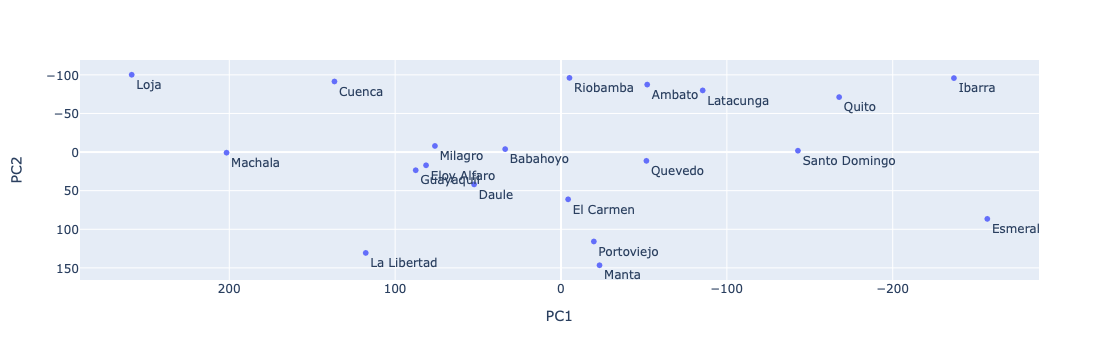

In [83]:
fig = px.scatter(my_pcoa['loadings'], x='PC1', y='PC2', text=my_pcoa['loadings'].index)
fig.update_yaxes(autorange="reversed")
fig.update_xaxes(autorange="reversed")
fig.update_traces(textposition="bottom right")
fig

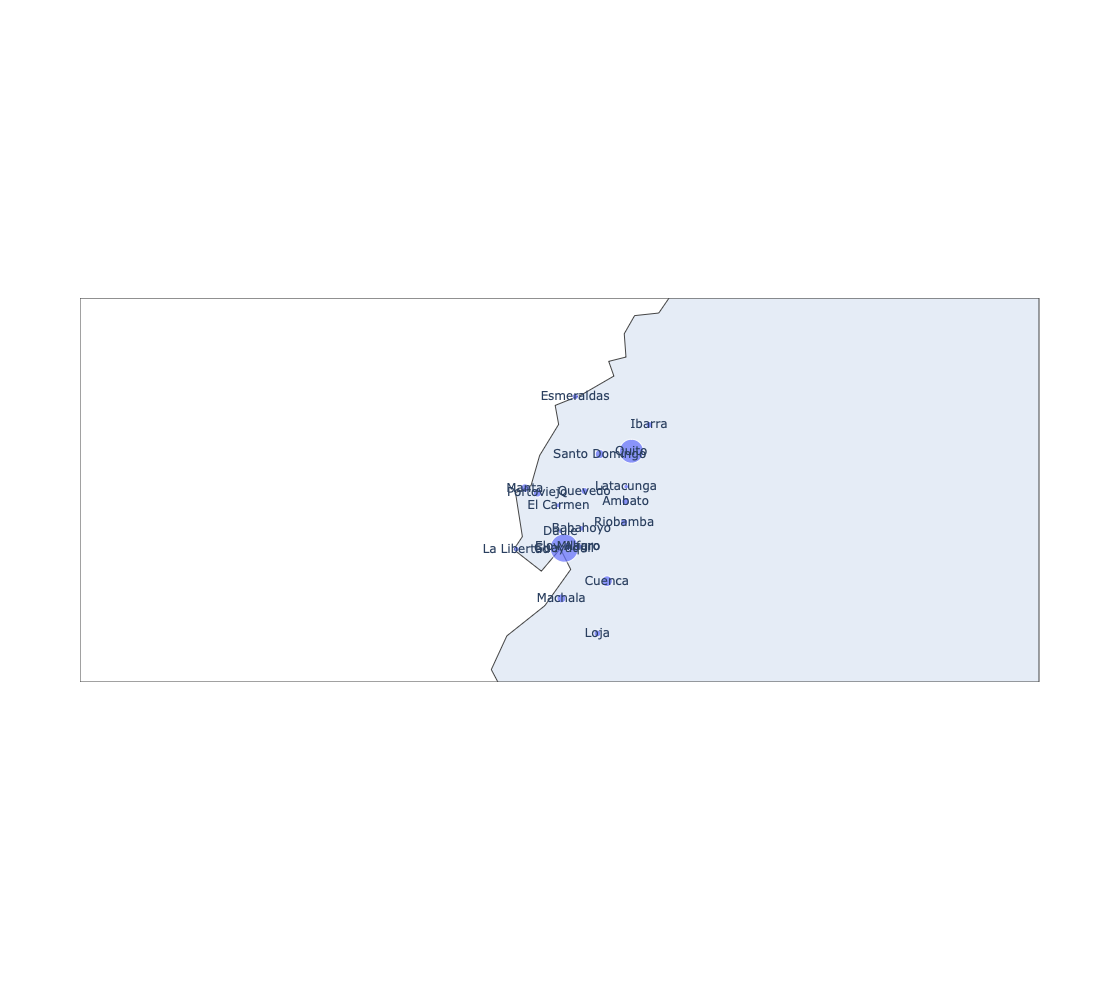

In [112]:
fig2 = px.scatter_geo(top_cities, lon = 'long', lat = 'lat',text="name", size="pop")

fig2.update_geos(
    lataxis_range=[-5, 3],
    lonaxis_range=[-90, -70]
)

fig2.update_layout(
    width = 1000,
    height = 1000
)

fig2.show()